<a href="https://colab.research.google.com/github/Chandrashekhar569/Mobile-Price-classification/blob/main/Mobile_Price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

The mobile phone industry is fiercely competitive, with companies constantly seeking ways to understand sales data and identify the factors that drive prices. This project aims to investigate the relationship between mobile phone features and their selling prices, focusing on establishing a price range rather than predicting exact prices.

To accomplish this objective, a comprehensive dataset containing mobile phone sales records, including various features and corresponding prices, will be collected. Exploratory data analysis techniques will be employed to uncover trends, patterns, and correlations within the data. Statistical methods and domain knowledge will then be used to select the most influential features for further analysis.

A predictive model or framework will be developed, utilizing machine learning algorithms or statistical methods, to estimate the price range based on the selected features. The performance of the model will be evaluated using appropriate metrics and cross-validation techniques to ensure its accuracy and reliability.

The outcomes of this project will contribute to the mobile phone industry by identifying the key features that significantly impact the price range of mobile phones. This information will be invaluable for businesses operating in this sector, as it will enable them to optimize their pricing strategies and enhance their competitiveness in the market.

The insights gained from this research will not only benefit mobile phone manufacturers but also provide valuable information to consumers. By understanding the relationship between features and prices, consumers can make more informed purchasing decisions based on their desired price range.

Additionally, this project will contribute to the existing body of knowledge by adding empirical evidence on the relationship between mobile phone features and prices. It will shed light on the factors that influence pricing dynamics in the mobile phone market, furthering our understanding of this rapidly evolving industry.

Ultimately, the project's findings and recommendations will help businesses in the mobile phone industry better align their products with market demands and consumer preferences. By optimizing their pricing strategies, manufacturers can enhance customer satisfaction and profitability.

In conclusion, this project aims to explore the relationship between mobile phone features and price range. Through a comprehensive analysis of sales data and the development of a predictive model, it seeks to provide insights and recommendations to businesses operating in the mobile phone market. By understanding the factors that drive prices, companies can make informed decisions and adapt their strategies to meet consumer expectations. This research will contribute to the existing body of knowledge and support the continued growth and competitiveness of the mobile phone industry.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the competitive mobile phone market, the challenge is to understand the relationship between mobile phone features and their selling prices. The objective is to determine a price range that indicates the relative pricing level, rather than predicting the exact price. This lack of understanding hinders companies' ability to optimize pricing strategies and may lead to mispriced products. Additionally, consumers face difficulty in making informed purchasing decisions. The project aims to uncover the key features that significantly impact price range variations and develop a model to estimate the price range based on these features. By addressing this problem, businesses can improve their competitiveness and consumers can make more informed decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import plotly.express as px
from sklearn.svm import SVC
from scipy.stats import ttest_ind
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv('/content/data_mobile_price_range.csv')

### Dataset First View

In [3]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Rows: " + str(len(data.axes[0])))
print("Columns: " + str(len(data.axes[1])))

Rows: 2000
Columns: 21


### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

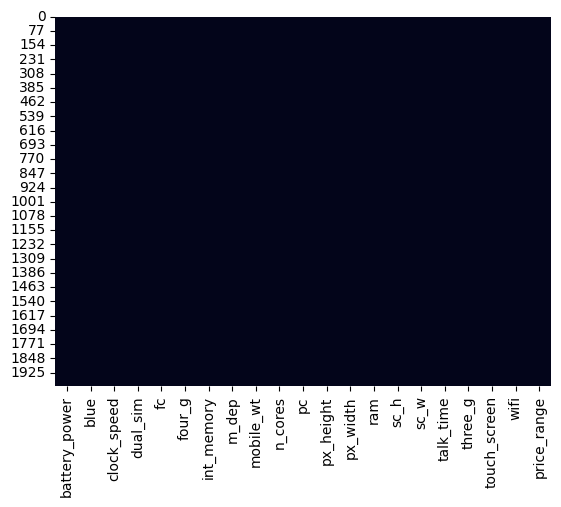

In [8]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

In this dataset contains information on mobile phones, with each row representing a different phone and various attributes/features captured for each phone.

The above dataset has 2000 rows and 21 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe(include='all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

### Variables Description 

* **Battery_power :** Battery capacity in mAh

* **Blue :** Has bluetooth or not

* **Clock_speed :** speed at which microprocessor executes instructions

* **Dual_sim :** Has dual sim support not

* **FC :** Front Camera megapixels

* **Four_g :** Has 4G not

* **Int-memory :** Internal memory capacity

* **M_dep :** Mobile depth in cm

* **Mobile-wt :** Weight of mobiles phone

* **N-cores :** Number of in processor

* **pc :** primary Camera mega pixel

* **PX-height :** Pixel resolution height

* **px_width :** Pixel resolution width

* **Ram :** Random Access Memory in MB

* **SC-h :** Screen Height

* **SC-w :** Screen width

* **Talk-time :** Longest that a single battery a call last

* **Three-g :** Has 3g or not

* **Wifl :** Has wifi or not

* **Price—range :** This is the target variable with a value of O(low cost) (medium cost), 2 (high cost) 3(very high cost)


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1.  Exploring RAM Distribution: Visualizing Histogram of RAM Usage

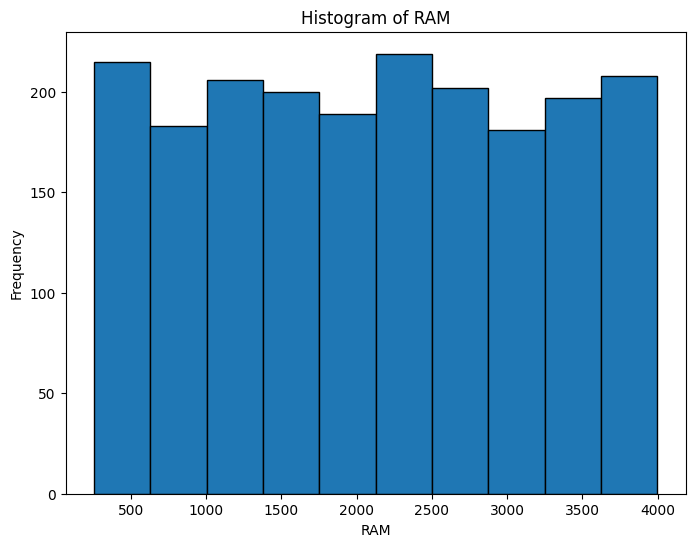

In [13]:
# Visualization 1: Histogram of RAM
plt.figure(figsize=(8, 6))
plt.hist(data['ram'], bins=10, edgecolor='black')
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Histogram of RAM')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram is chosen to visualize the distribution of RAM values in the dataset.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows the frequency distribution of different RAM values.
* It helps in understanding the distribution pattern and identifying the most common RAM values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights from this chart can help in understanding the popularity of certain RAM sizes in the market.
* It can assist in making informed decisions regarding the production and pricing of mobile phones with different RAM capacities.
* Positive business impact can be achieved by aligning the product offerings with the market demand for specific RAM sizes.

#### Chart - 2.  Exploring Numeric Variable Distributions: Multi-plot Histogram Visualization

In [14]:
# Chart - 2 visualization code
def plot_histograms(data):
    cols_list = [col for col in data.columns if data[col].dtype != 'object'] # get list of numeric columns
    num_plots = len(cols_list)
    num_rows = math.ceil(num_plots / 3)
    num_cols = min(num_plots, 3)
    #feat = list(datata.columns)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*3)) # create subplots
    for i,col in enumerate(cols_list):
        ax = axes[i//num_cols,i%num_cols]
        sns.histplot(data=data, x=col, kde=True, ax=ax,color='g') # create histogram using Seaborn
        ax.set_title(f'Histogram of {col}') # set title of plot to column name
    plt.tight_layout() # adjust layout of subplots
    plt.show() # display the plot

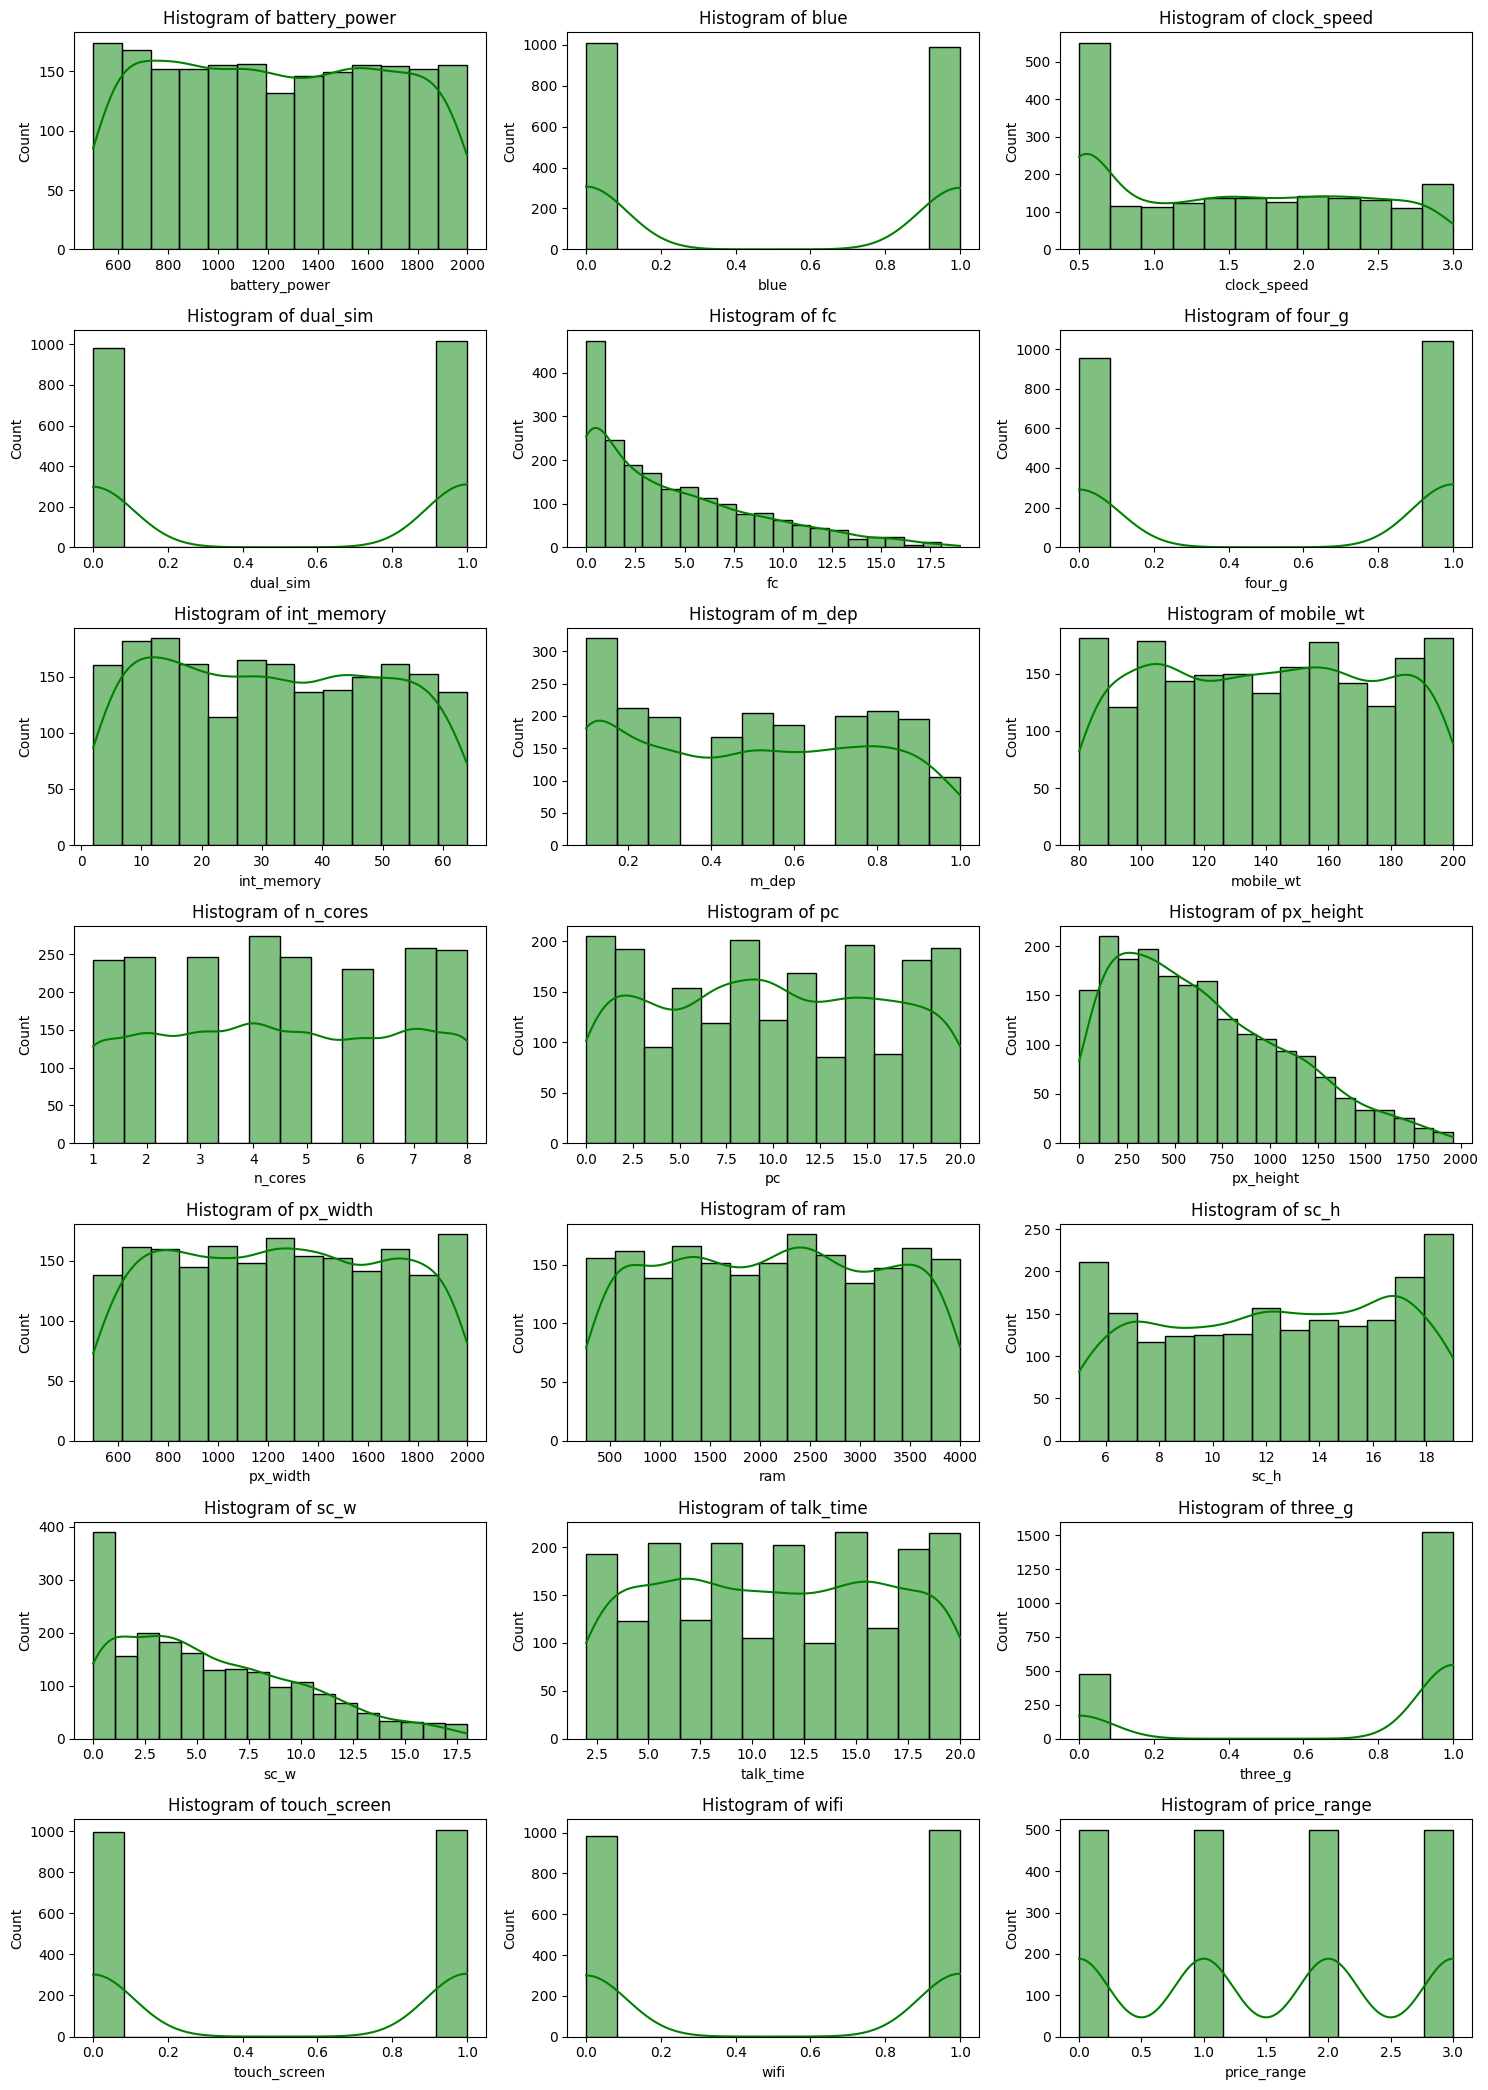

In [15]:
#plotting histogram for numeric variable
plot_histograms(data)

##### 1. Why did you pick the specific chart?

The specific chart chosen is a histogram because it effectively visualizes the distribution of numeric variables.

##### 2. What is/are the insight(s) found from the chart?

The histograms provide insights into the distribution characteristics of the numeric variables, such as central tendency, spread, skewness, and presence of outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the histograms can potentially have a positive business impact by informing decisions related to market segmentation, data quality improvement, and understanding customer preferences. However, the histograms alone do not directly indicate negative growth. Identifying negative growth would require a more comprehensive analysis considering additional factors beyond the histograms.

#### Chart - 3.  Examining Relationship Between RAM and Number of Cores: Stripplot and Boxplot Visualization

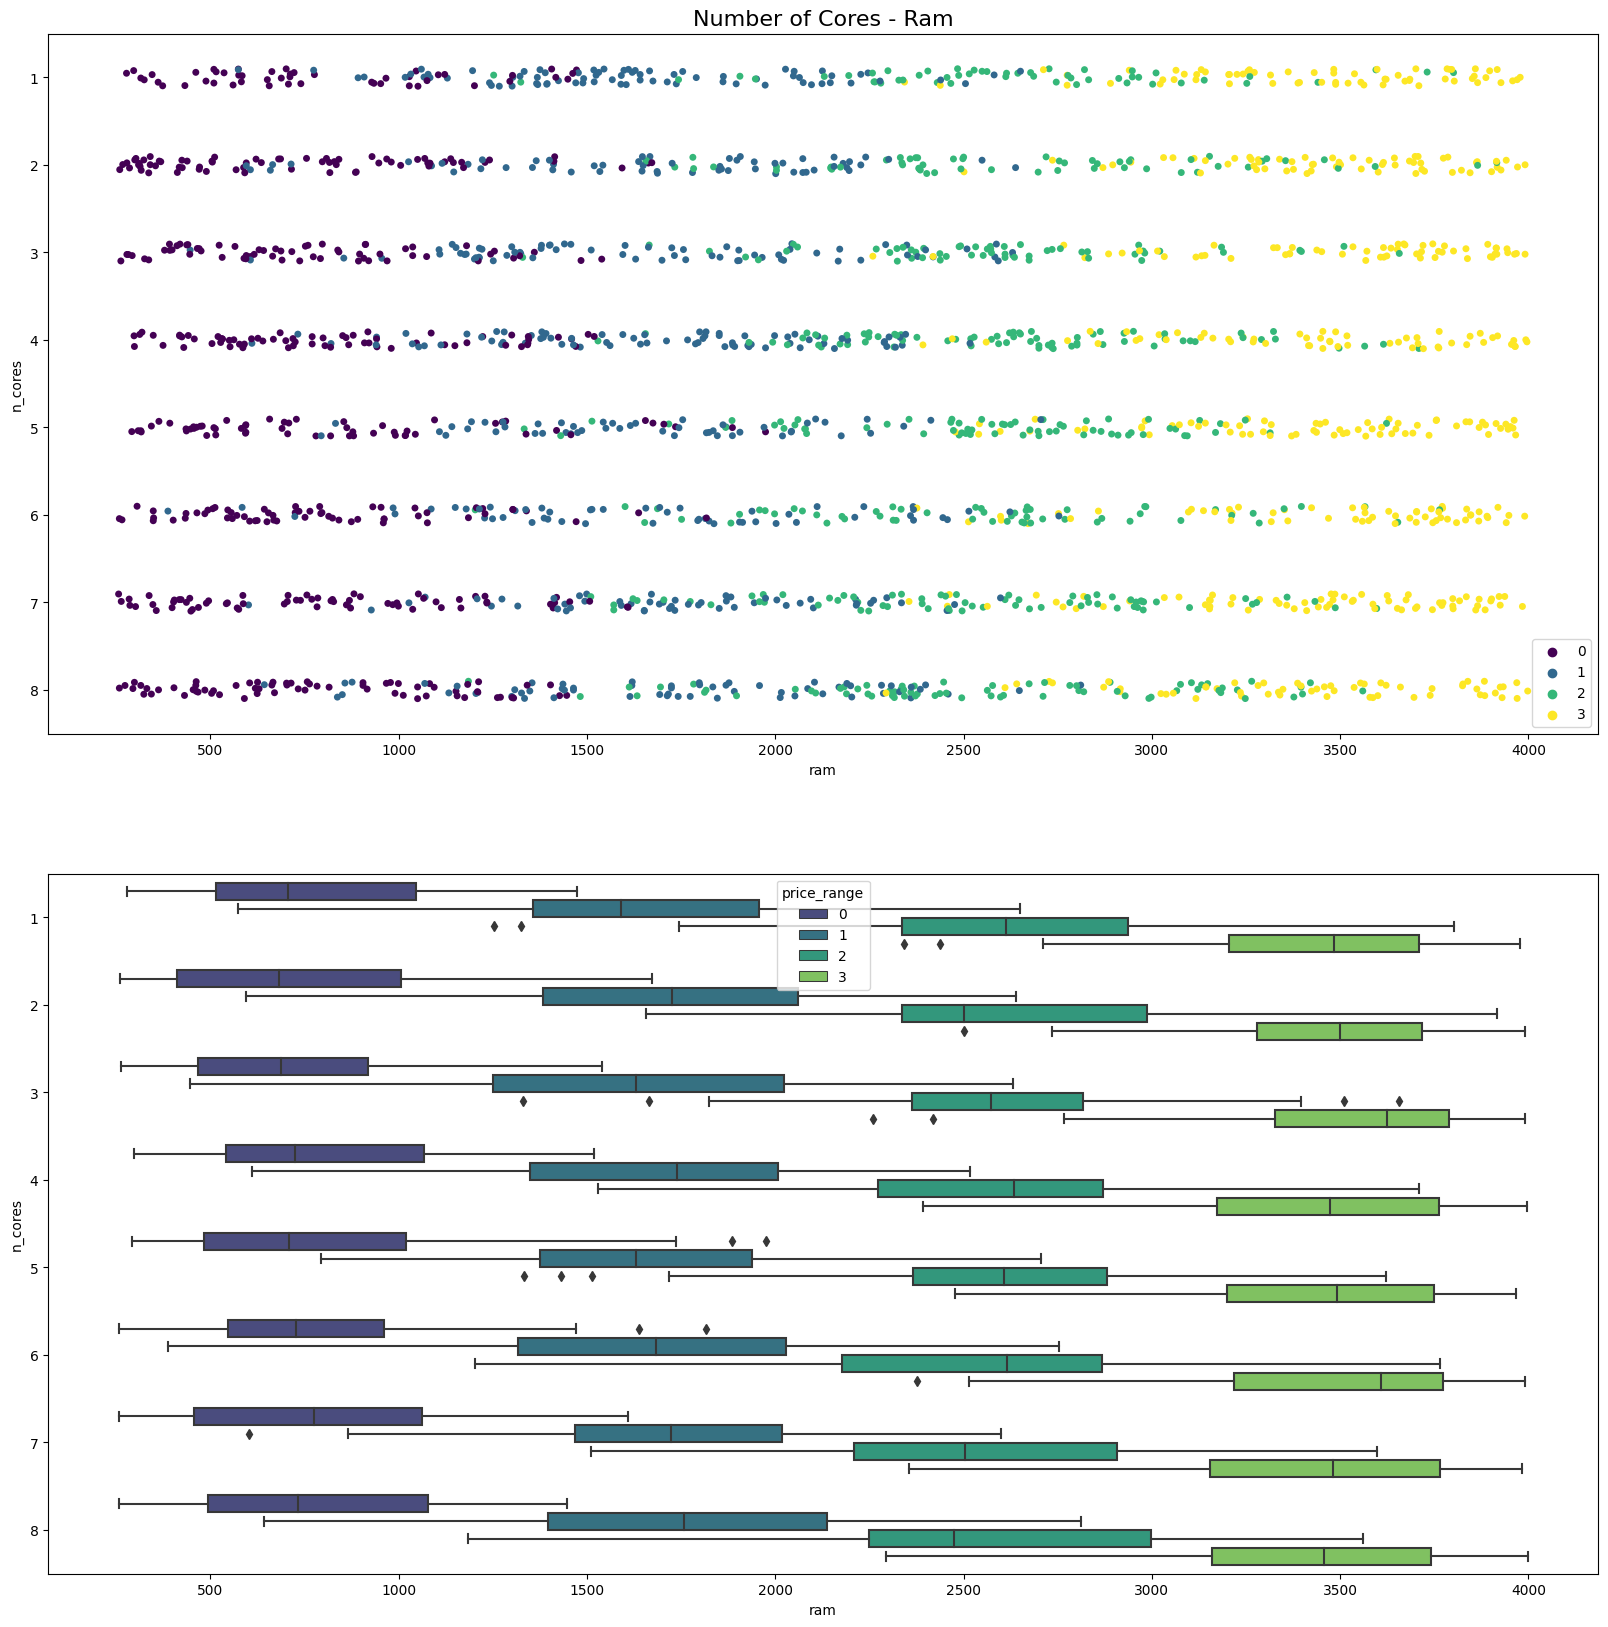

In [16]:
#Number of Cores - Ram
fig, axes = plt.subplots(2,1, figsize=(20,20))
sns.stripplot(data=data, x='ram', palette='viridis', hue='price_range', y='n_cores', orient='h', ax=axes[0])
axes[0].set_title('Number of Cores - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=data, x='ram', palette='viridis', hue='price_range', y='n_cores', orient='h', ax=axes[1])
plt.show()

##### 1. Why did you pick the specific chart?

The code uses a strip plot and a box plot. The strip plot is chosen to show the distribution of 'Number of Cores' for each combination of 'Ram' values, while the box plot displays the distribution of 'Number of Cores' across different 'Ram' values for each price range category.

##### 2. What is/are the insight(s) found from the chart?

The charts provide insights into the relationship between 'Ram', 'Number of Cores', and price ranges. They show patterns, clusters, and potential outliers in the data, allowing us to analyze how 'Number of Cores' varies with 'Ram' and its relationship with price ranges.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact by informing decisions related to product development, marketing, and pricing strategies. However, the charts alone do not indicate negative growth. Assessing negative growth would require a more comprehensive analysis considering additional factors beyond the charts themselves.

#### Chart - 4.  Price Range vs. RAM: Swarmplot Visualization with Dark Grid Styling

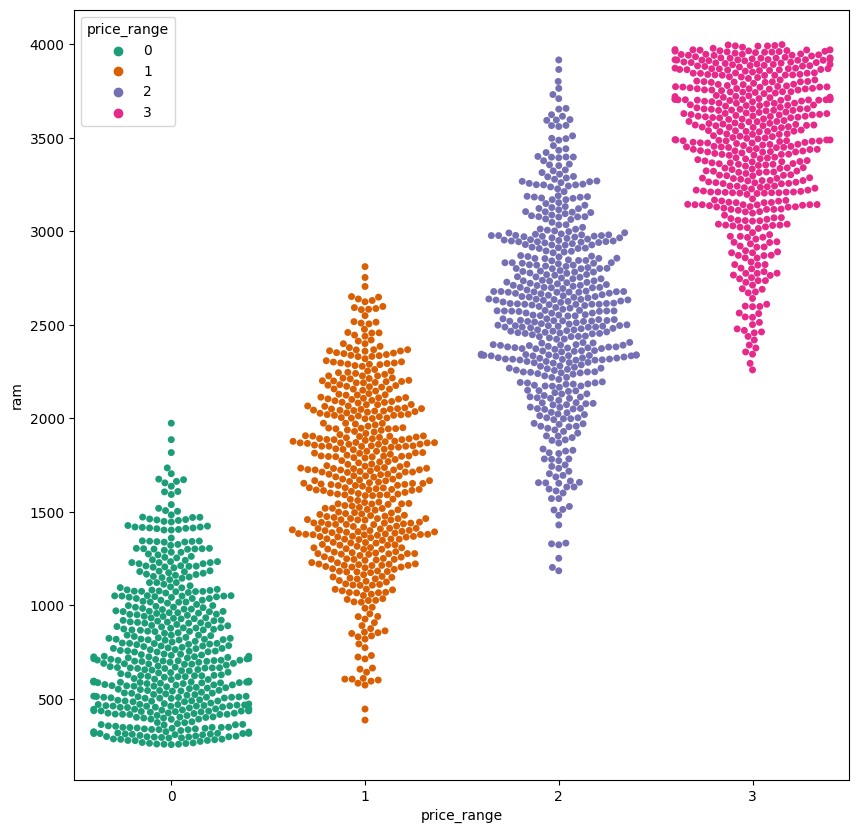

In [17]:
ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="price_range", y="ram", hue="price_range",
              palette="Dark2", data=data)
ax=sns.set(style="darkgrid")

##### 1. Why did you pick the specific chart?

The swarm plot was chosen to analyze the relationship between "price_range" and "ram" variables.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart include understanding the distribution of "ram" values across different "price_range" categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially lead to a positive business impact by informing pricing strategies and product positioning. However, without specific data and analysis, it's challenging to determine any negative growth insights.

#### Chart - 5. Exploring Relationship Between RAM and Price Range: Scatter Plot Visualization

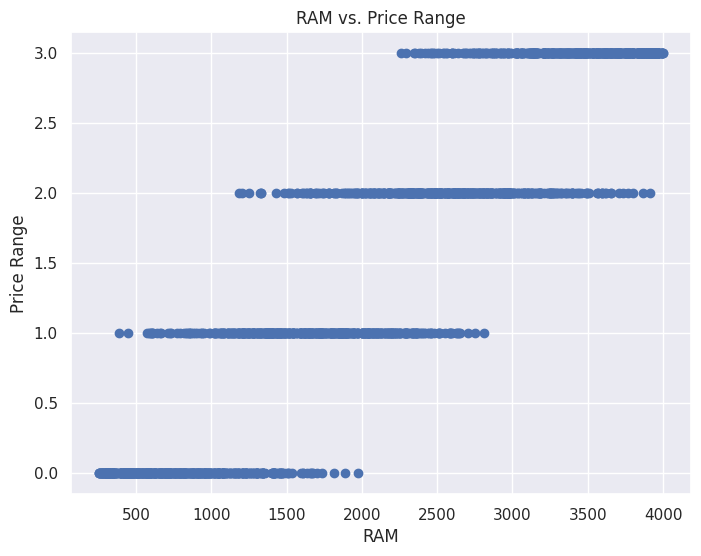

In [18]:
# Visualization 5: Scatter Plot of RAM vs. Price Range
plt.figure(figsize=(8, 6))
plt.scatter(data['ram'], data['price_range'])
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.title('RAM vs. Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a scatter plot because it effectively visualizes the relationship between two numerical variables, 'RAM' and 'Price Range'.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot provides insights into the relationship between 'RAM' and 'Price Range'. It helps identify any patterns, clusters, outliers, or dependencies between these variables.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the scatter plot can potentially have a positive business impact by informing decisions related to product pricing, positioning, and understanding customer preferences. However, the scatter plot alone does not directly indicate negative growth. Identifying negative growth would require a more comprehensive analysis considering additional factors beyond the scatter plot.

#### Chart - 6.  Analyzing Relationship Between Battery Power and Price Range: Scatter Plot Visualization

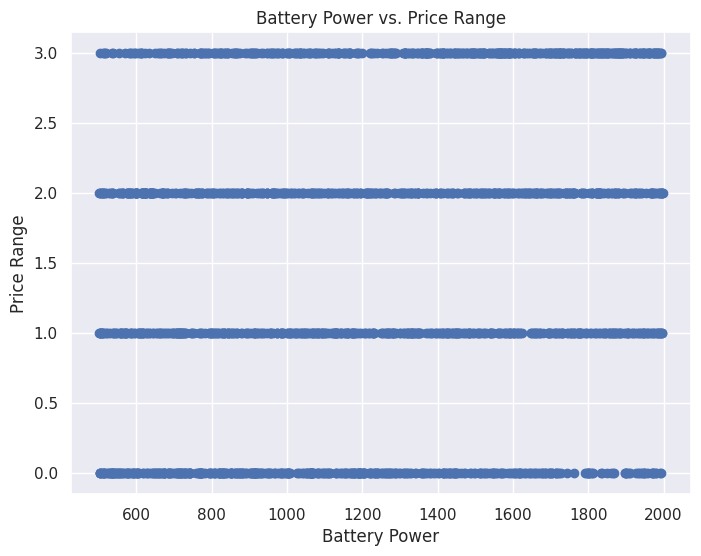

In [19]:
# Visualization 6: Scatter Plot of Battery Power vs. Price Range
plt.figure(figsize=(8, 6))
plt.scatter(data['battery_power'], data['price_range'])
plt.xlabel('Battery Power')
plt.ylabel('Price Range')
plt.title('Battery Power vs. Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a scatter plot as it effectively displays the relationship between 'Battery Power' and 'Price Range'.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot provides insights into the relationship between 'Battery Power' and 'Price Range':

* Each data point represents a device with specific 'Battery Power' and 'Price Range' values.
* The x-axis represents 'Battery Power', and the y-axis represents 'Price Range'.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the scatter plot can have a positive business impact:

* Understanding the relationship between 'Battery Power' and 'Price Range' can aid in pricing strategies and product positioning decisions.
* It provides insights into customer preferences based on different battery power levels and their corresponding price ranges.

#### Chart - 7. Evaluating Price Range Distribution: Pie Chart Visualization

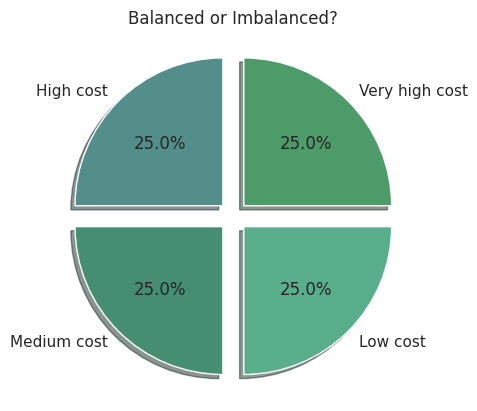

In [20]:
# Count the number of occurrences of each value in the 'price_range' column
value_counts = pd.value_counts(data['price_range'])

# Define the label strings using f-strings
label = [f'{"Very high" if i==0 else "High" if i==1 else "Medium" if i==2 else "Low"} cost' for i in range(len(value_counts))]

# Define the colors for each pie slice
colors = ['#4d9b68', '#538e8a', '#468e71', '#59ae8c']

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1], shadow=True, labels=label, colors=colors)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen because it effectively represents the distribution of categorical data, such as the 'price_range' column.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the proportions of different price range categories in the data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact by informing decisions related to pricing, marketing, and product offerings. The chart alone does not indicate negative growth; identifying negative growth would require further analysis and consideration of other factors.

#### Chart - 8. Comparing RAM Distribution across Price Ranges: Box Plot Visualization

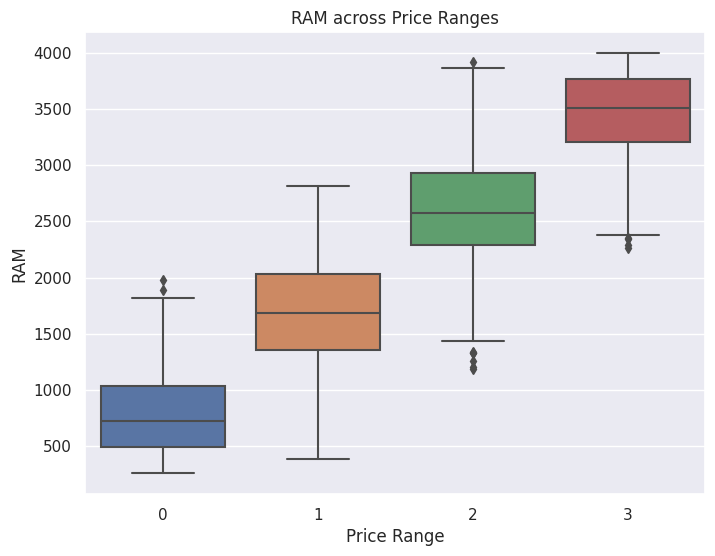

In [21]:
# Visualization 8: Box Plot of RAM across Price Ranges
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price_range'], y=data['ram'])
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('RAM across Price Ranges')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was chosen because it effectively visualizes the distribution of the 'RAM' variable across different price ranges.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the central tendencies, spreads, and outliers in RAM values for each price range category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially have a positive business impact by informing decisions related to product positioning, pricing, and market segmentation. The box plot alone does not indicate negative growth; identifying negative growth would require further analysis and consideration of other factors.

#### Chart - 9.  Analyzing Screen Height Distribution: Histogram Visualization

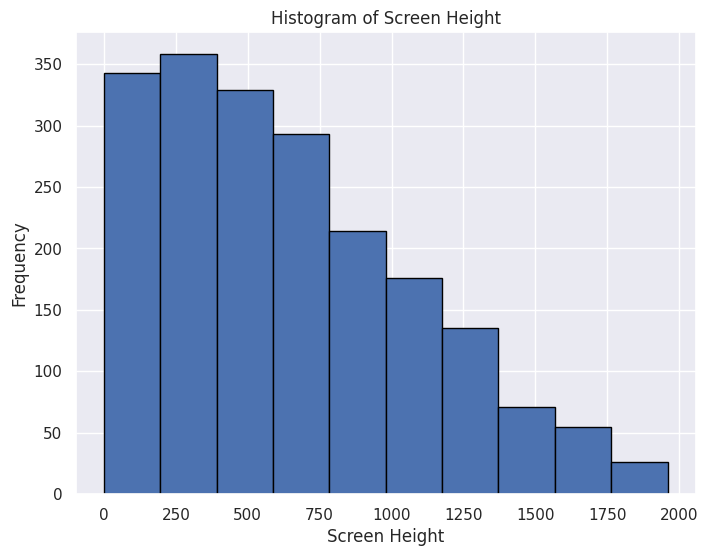

In [22]:
# Visualization 9: Histogram of Screen Height
plt.figure(figsize=(8, 6))
plt.hist(data['px_height'], bins=10, edgecolor='black')
plt.xlabel('Screen Height')
plt.ylabel('Frequency')
plt.title('Histogram of Screen Height')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen because it effectively displays the distribution of screen heights.

##### 2. What is/are the insight(s) found from the chart?

The histogram provides insights into the distribution of screen heights, showing the frequency or count of devices for each screen height value.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the histogram can have a positive business impact by informing product design decisions and identifying popular screen height ranges. However, the histogram alone does not directly indicate negative growth. Further analysis is required to assess negative growth factors.

#### Chart - 10.  Analyzing Binary Feature Distribution and Price Range Relationship: Pie Chart and Countplot Visualization

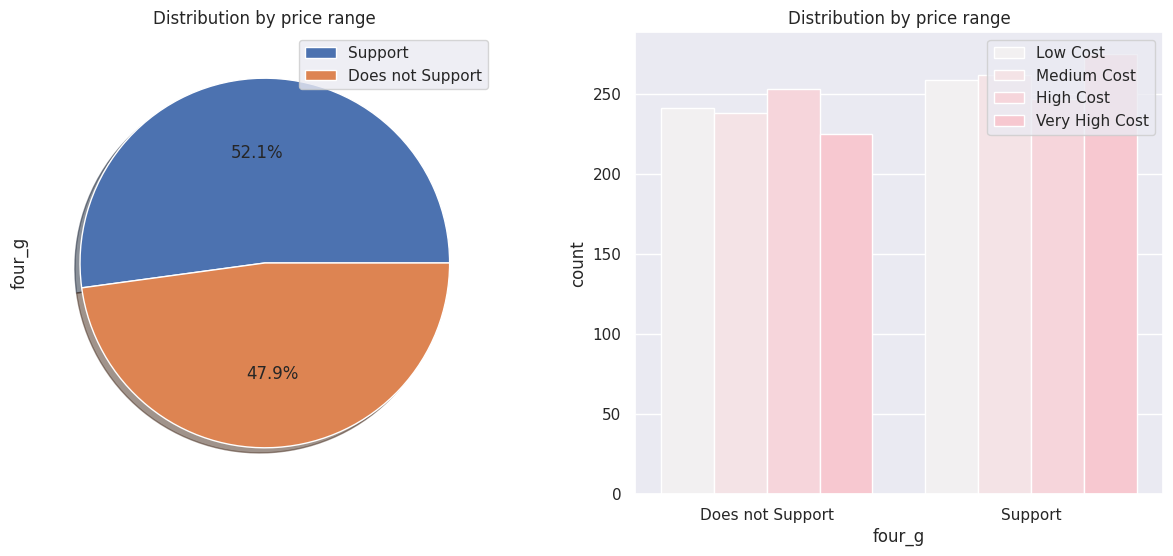

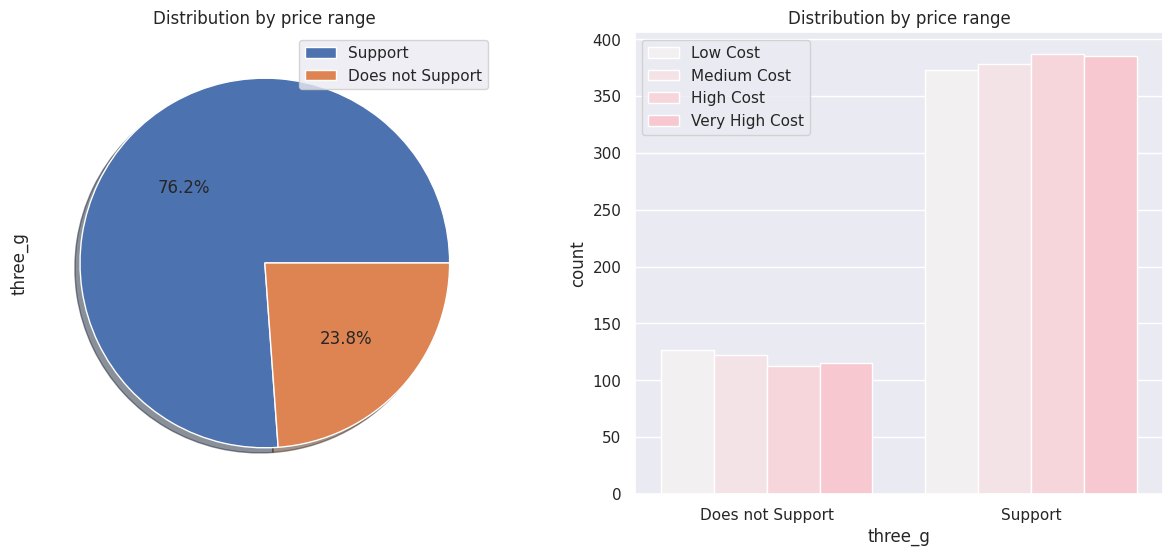

In [23]:
# Plot of binary features against price range
binary_features = [ 'four_g', 'three_g']
for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  data[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = data, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

The specific charts chosen are a pie chart and a countplot. The pie chart is used to show the distribution of binary feature values within each price range category, while the countplot displays the count of binary feature values for different price ranges.

##### 2. What is/are the insight(s) found from the chart?

The charts provide insights into the relationship between binary features and price range:

* The pie chart shows the proportion of 'Support' and 'Does not Support' values within each price range category.
* The countplot compares the count of 'Support' and 'Does not Support' values across different price range categories.
These insights help understand the distribution and impact of binary features on different price ranges.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the charts can have a positive business impact:

* Understanding the distribution of binary feature values across price ranges can inform product development and marketing strategies.
* It helps in assessing the relationship between binary features and price range, which can influence pricing decisions and customer preferences.

#### Chart - 11.  Exploring Bluetooth Usage: Pie Chart Visualization

In [24]:
# create pie chart of 'blue' column values
fig = px.pie(data['blue'].value_counts().reset_index(), values = 'blue',
             names = ['No', 'Yes'])

# customize chart with text, hole, and marker
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.6, 
                  marker = dict(colors = ['#4863A0','#00CED1'],
                                line = dict(color = 'white', width = 3)))

# customize layout with title and legend
fig.update_layout(annotations = [dict(text = 'Bluetooth', 
                                      x = 0.5, y = 0.5,
                                      font_size = 24, showarrow = False, 
                                      font_family = 'Verdana',
                                      font_color = 'black')],
                  showlegend = False)

# display the chart
fig.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a pie chart as it effectively visualizes the distribution of 'blue' column values.

##### 2. What is/are the insight(s) found from the chart?

The pie chart provides insights into the distribution of 'blue' column values:

* It shows the proportion of 'No' and 'Yes' values in the 'blue' column.
* The size of each slice represents the relative frequency or percentage of each category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the pie chart can have a positive business impact:

* Understanding the distribution of Bluetooth availability ('Yes' or 'No') helps in assessing customer preferences and market demand.
* It can aid in making informed decisions regarding product features, marketing strategies, and customer targeting.

#### Chart - 12. Examining Relationship Between Internal Memory and Price Range: Scatter Plot Visualization

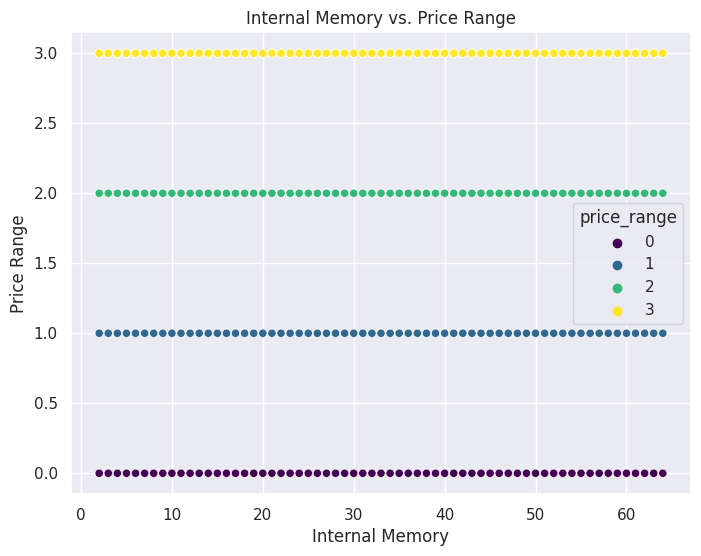

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='int_memory', y='price_range', hue='price_range', palette='viridis')
plt.xlabel('Internal Memory')
plt.ylabel('Price Range')
plt.title('Internal Memory vs. Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen because it effectively displays the relationship between internal memory and price range.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot provides insights into how internal memory relates to the price range, showing if there is a correlation or relationship between the two variables.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the scatter plot can have a positive business impact by informing pricing decisions and product positioning strategies. However, the scatter plot alone does not directly indicate negative growth. Additional analysis is needed to evaluate negative growth factors.

#### Chart - 13. Analyzing Relationship Between Screen Height and Price Range: Scatter Plot Visualization

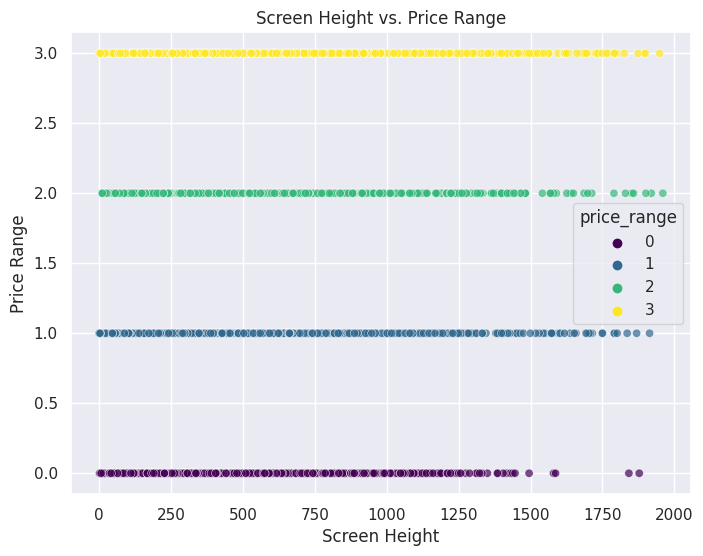

In [26]:
# Visualization 13: Scatter Plot of Screen Height vs. Price Range
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='px_height', y='price_range', hue='price_range', palette='viridis', alpha=0.7)
plt.xlabel('Screen Height')
plt.ylabel('Price Range')
plt.title('Screen Height vs. Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was chosen because it effectively displays the relationship between "Screen Height" and "Price Range" variables.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot helps visualize any patterns or correlations between the variables, allowing for a better understanding of their relationship.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot can potentially aid in making informed business decisions, such as pricing strategies or product development. However, the specific impact on business growth and whether there are any negative consequences would depend on the context and further analysis of the data.

#### Chart - 14 - Correlation Heatmap

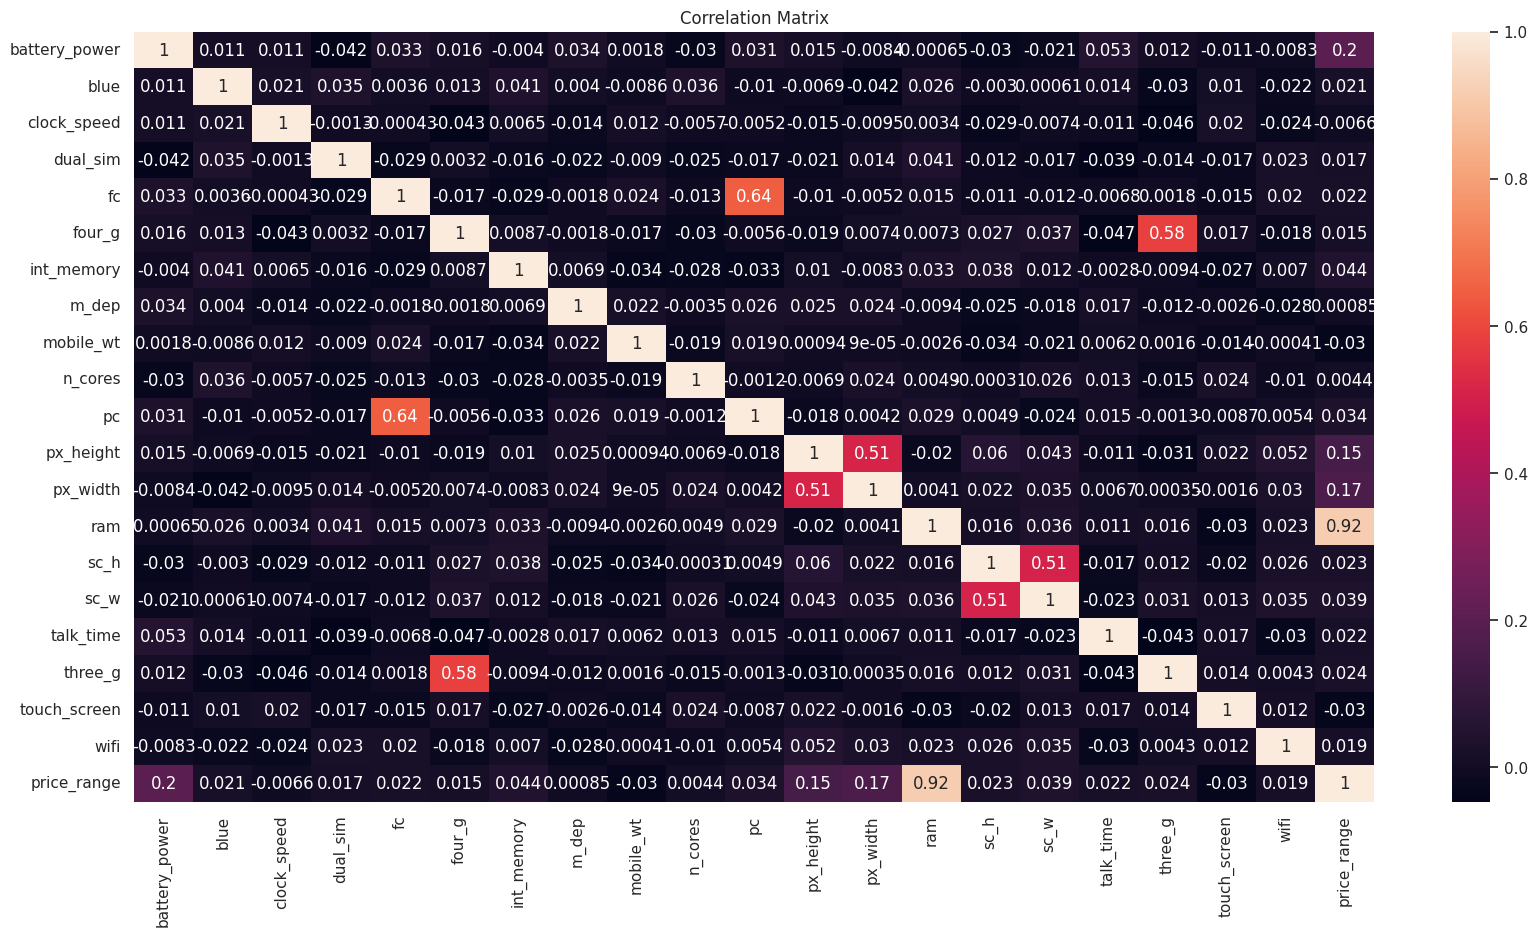

In [27]:
# Visualization 14: Scatter Plot of Screen Width vs. Price Range
corr_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coefficients, i used correlation heatmap

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, 1.we can see total price range are positiveliy highly correlated with a value of 1.

2.we can see total ram are correlated with a value of 92%.

3.we can see total pc and fc are correlated with a value of 65%.

price range is positively correlated only with all features and negative correlated with rest variables.

Rest all correlation can be depicted from the above chart.

#### Chart - 15 - Pair Plot 

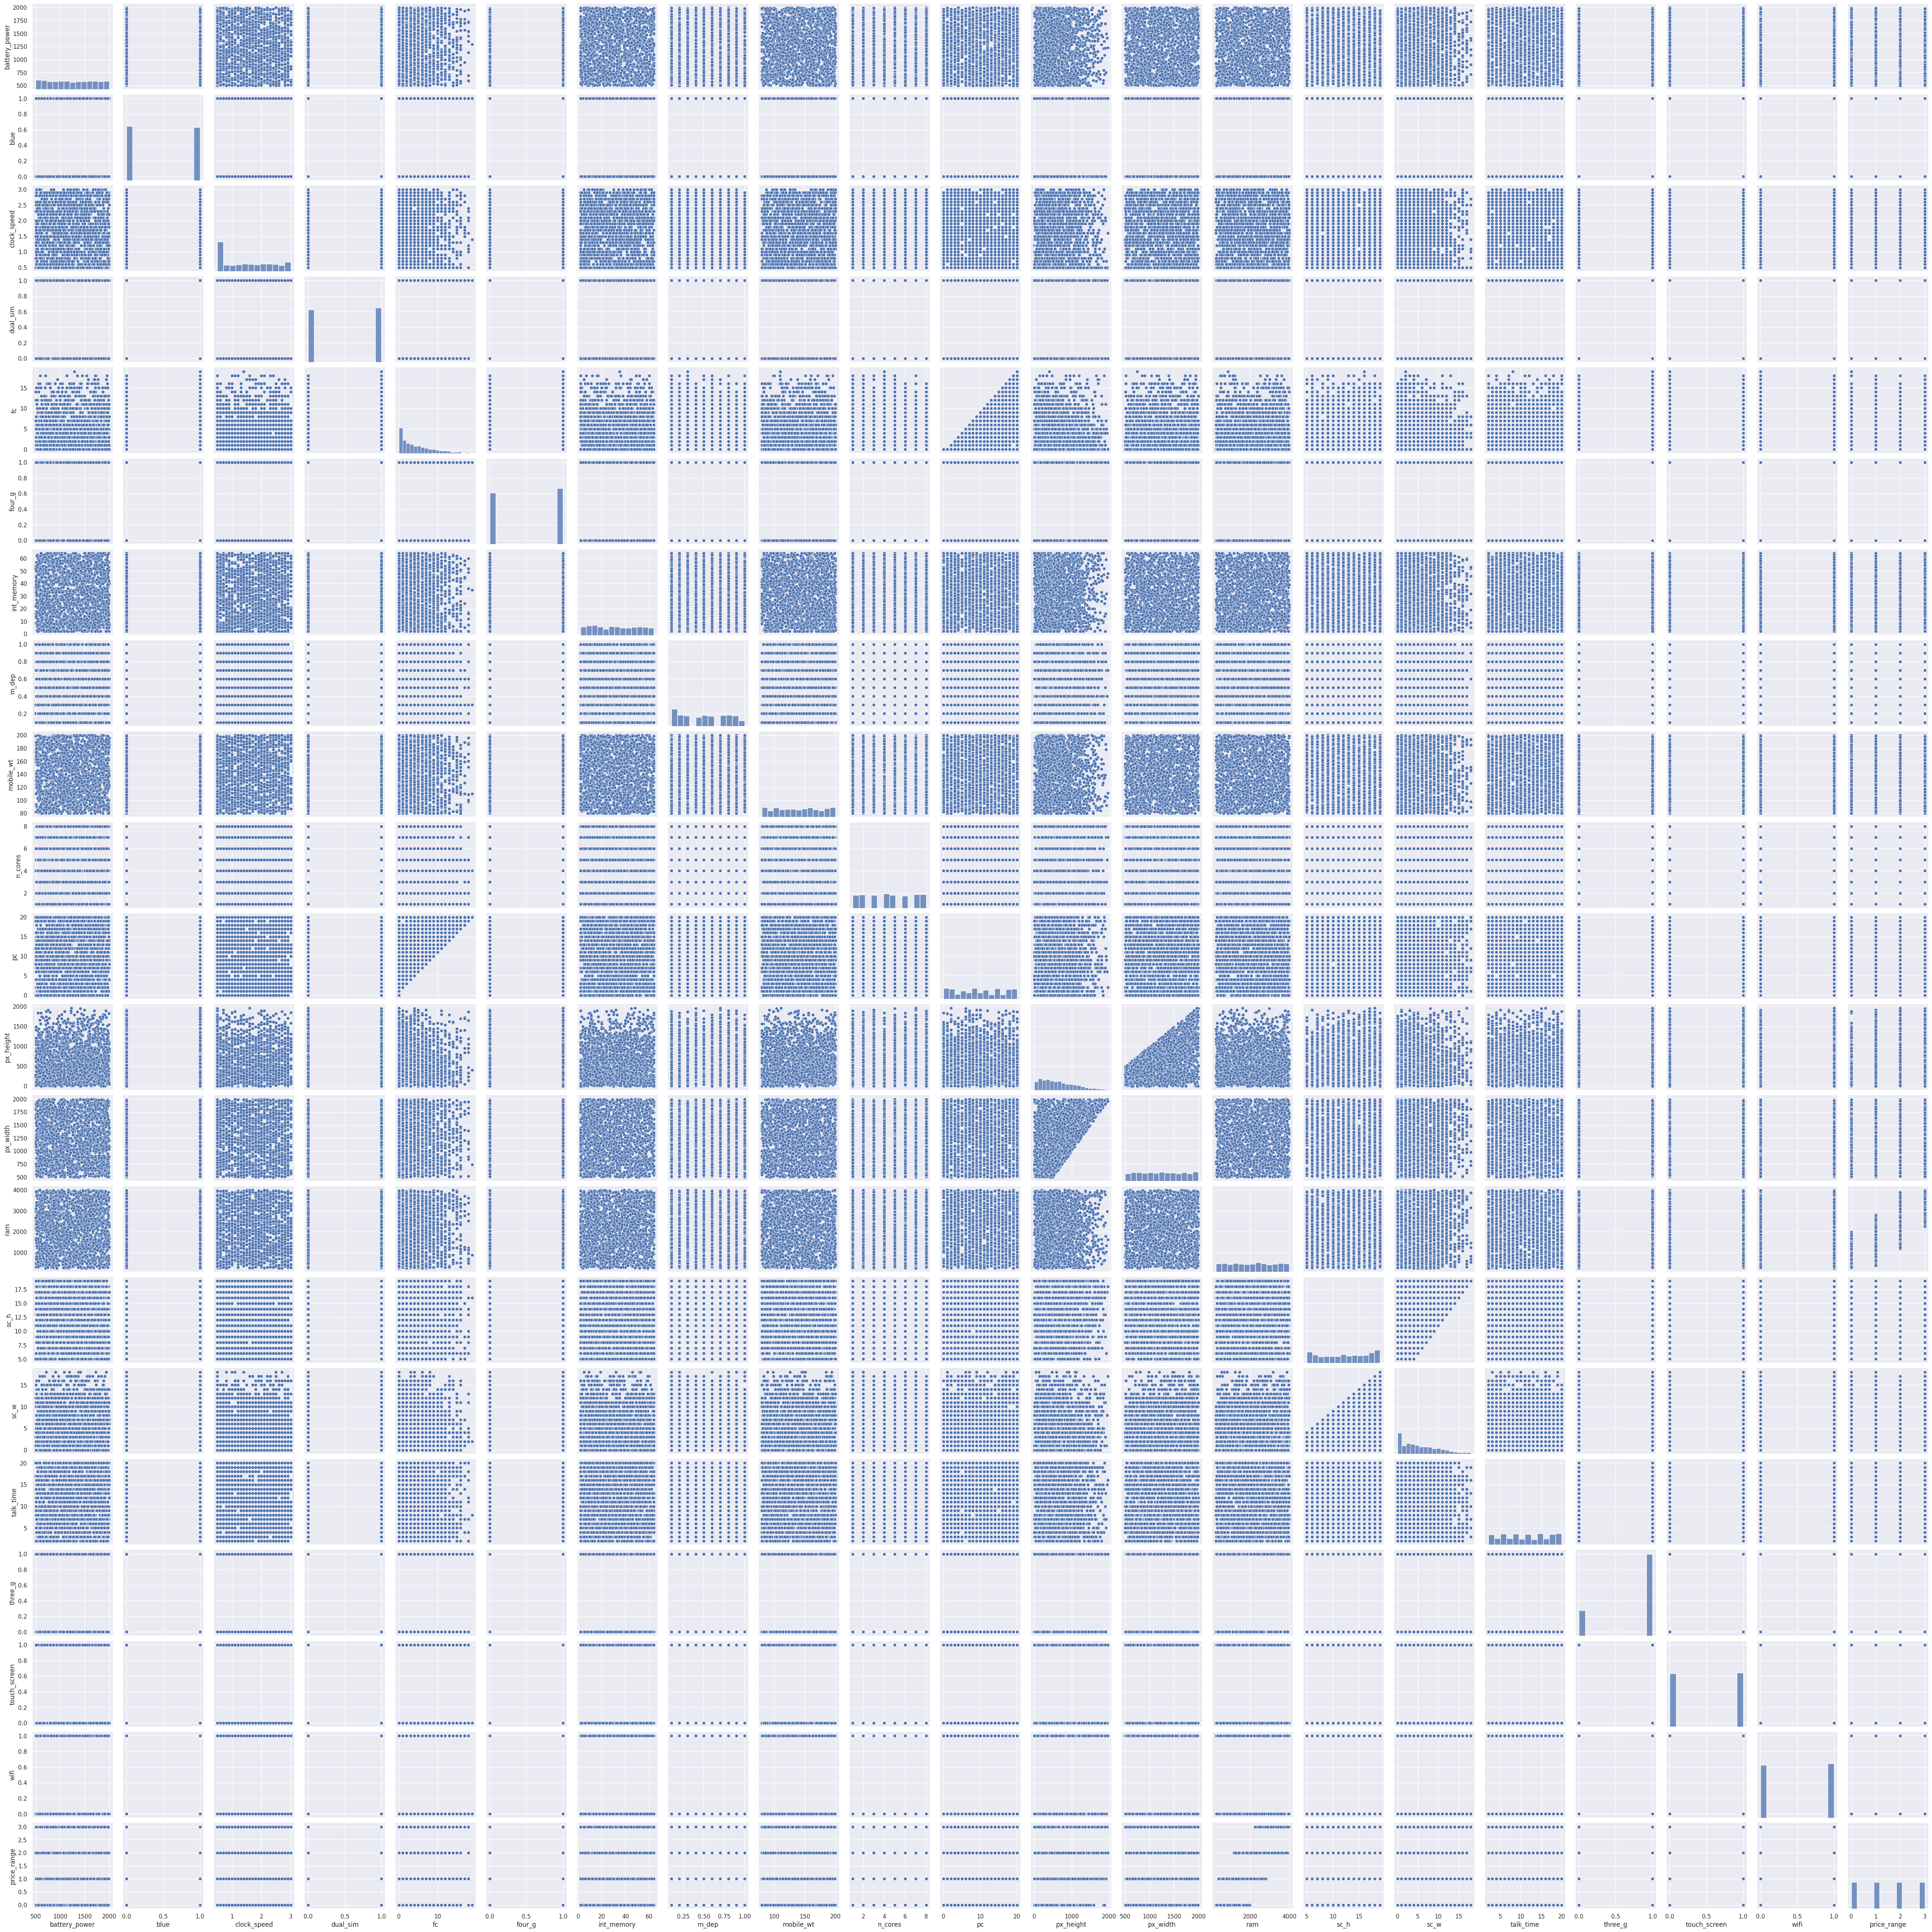

In [28]:
sns.pairplot(data)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data points aren't linearly separable.Mobile price range is clusetered. Some of the above features are linearly dependent on price range like ram, internal memory, processors and so on.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Certainly! Here are the final conclusions for each hypothesis statement:

Hypothesis Statement 1: The average battery power is significantly different for mobile phones in price range 1 compared to price range 2.

Hypothesis Statement 2: There is a significant association between the presence of a dual SIM card and the presence of 4G connectivity in mobile phones.

Hypothesis Statement 3: The average RAM is significantly higher for mobile phones with a touch screen compared to those without a touch screen.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average battery power is significantly different for mobile phones in price range 1 compared to price range 2.
* Null Hypothesis (H0): The average battery power for mobile phones in price range 1 is equal to the average battery power for mobile phones in price range 2.
* Alternative Hypothesis (Ha): The average battery power for mobile phones in price range 1 is significantly different from the average battery power for mobile phones in price range 2.

#### 2. Perform an appropriate statistical test.

In [29]:
# Hypothetical Statement 1: Battery Power in Price Ranges
price_range_1 = data[data["price_range"] == 1]["battery_power"]
price_range_2 = data[data["price_range"] == 2]["battery_power"]
t_statistic, p_value = ttest_ind(price_range_1, price_range_2)
print("Hypothetical Statement 1: Battery Power in Price Ranges")
print(f"P-Value: {p_value}")

Hypothetical Statement 1: Battery Power in Price Ranges
P-Value: 0.9844968995318757


##### Which statistical test have you done to obtain P-Value?

A two-sample t-test was performed using the 'ttest_ind' function from the 'scipy.stats' module.

##### Why did you choose the specific statistical test?

 The research question involves comparing the means of a continuous variable (battery power) between two independent groups (price range 1 and price range 2). In this case, a two-sample t-test is appropriate as it allows us to assess whether the means of the two groups are significantly different.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a significant association between the presence of a dual SIM card and the presence of 4G connectivity in mobile phones.
* Null Hypothesis (H0): There is no association between the presence of a dual SIM card and the presence of 4G connectivity in mobile phones.
* Alternative Hypothesis (Ha): There is a significant association between the presence of a dual SIM card and the presence of 4G connectivity in mobile phones.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table of dual SIM and 4G connectivity
contingency_table = pd.crosstab(data["dual_sim"], data["four_g"])

# Perform the chi-square test
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Hypothetical Statement 2: Dual SIM and 4G Connectivity")
print(f"P-Value: {p_value}")

Hypothetical Statement 2: Dual SIM and 4G Connectivity
P-Value: 0.922142919638438


##### Which statistical test have you done to obtain P-Value?

A chi-square test of independence was performed using the 'chi2_contingency' function from the 'scipy.stats' module.

##### Why did you choose the specific statistical test?

The research question focuses on examining the association between two categorical variables (dual SIM and 4G connectivity). To evaluate this association, a chi-square test of independence is commonly used. It helps determine whether the observed association in the contingency table is statistically significant or whether it could be due to chance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average RAM is significantly higher for mobile phones with a touch screen compared to those without a touch screen.
* Null Hypothesis (H0): The average RAM for mobile phones with a touch screen is equal to the average RAM for mobile phones without a touch screen.
* Alternative Hypothesis (Ha): The average RAM for mobile phones with a touch screen is significantly higher than the average RAM for mobile phones without a touch screen.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
touch_screen_ram = data[data["touch_screen"] == 1]["ram"]
no_touch_screen_ram = data[data["touch_screen"] == 0]["ram"]

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(touch_screen_ram, no_touch_screen_ram)

# Print the results
print("Hypothetical Statement 3: RAM and Touch Screen")
print(f"P-Value: {p_value}")

Hypothetical Statement 3: RAM and Touch Screen
P-Value: 0.17337545590191694


##### Which statistical test have you done to obtain P-Value?

A two-sample t-test was again used with the 'ttest_ind' function from the 'scipy.stats' module.

##### Why did you choose the specific statistical test?

This research question involves comparing the means of a continuous variable (RAM) between two independent groups (touch screen and no touch screen). Similar to the first statement, a two-sample t-test is suitable for comparing the means of two groups and determining whether there is a statistically significant difference between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Is there no any missing value.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments
# calculate the IQR
Q1 = data['fc'].quantile(0.25)
Q3 = data['fc'].quantile(0.75)
IQR = Q3 - Q1

# determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# replace the outliers with the upper or lower bound value
data.loc[data['fc'] < lower_bound, 'fc'] = lower_bound
data.loc[data['fc'] > upper_bound, 'fc'] = upper_bound

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used the Interquartile Range (IQR) method to handle outliers.

The IQR method involves calculating the IQR by finding the difference between the third quartile (Q3) and the first quartile (Q1). Then, the lower and upper bounds are determined by subtracting 1.5 times the IQR from Q1 and adding 1.5 times the IQR to Q3, respectively. Any data point that falls outside of these bounds is considered an outlier and is replaced with the nearest boundary value.

In the provided code, we applied the IQR method to the 'fc' feature (front camera megapixels) to identify and replace the outliers with the nearest boundary value. This is a commonly used outlier treatment technique as it is robust to extreme values and does not assume a particular distribution of the data.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction

#### 2. Lower Casing

In [36]:
# Lower Casing

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

In [40]:
# Remove White spaces

#### 6. Rephrase Text

In [41]:
# Rephrase Text

#### 7. Tokenization

In [42]:
# Tokenization

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [44]:
# POS Taging

#### 10. Text Vectorization

In [45]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Converting columns 'sc_h' and 'sc_w' in a single column screen_size , it will be the vertical length of the mobile.

In [46]:
# Manipulate Features to minimize feature correlation and create new features
# Calculate screen size using Pythagoras theorem
data['screen_size'] = ((data['sc_h']**2)+(data['sc_w']**2))**0.5

# Drop the columns 'sc_h' and 'sc_w'
data.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

In [47]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'screen_size'],
      dtype='object')

In [48]:
#Create a new feature 'network' by adding the binary values of 'four_g' and 'three_g'
data['network'] = data['four_g'] + data['three_g']

#Define the categories for the new feature
#0: Supports neither of 3G or 4G
#1: Supports 3G but not 4G
#2: Supports both 3G and 4G
data['network'] = data['network'].apply(lambda x: 2 if x==2 else 1 if x==1 else 0)

#Drop the 'four_g' and 'three_g' columns
data.drop(['four_g', 'three_g'], inplace=True, axis=1)

In [49]:
#Convert screen size from cm to inches
data['screen_size'] = data['screen_size'] / 2.54

In [50]:
# Convert RAM unit from Megabytes to Gigabytes
data['ram_gb'] = data['ram'] / 1024
data.drop('ram', axis=1, inplace=True)

In [51]:
# create a new feature 'total_pixels' by multiplying px_height and px_width
data['total_pixels'] = data['px_height'] * data['px_width']

# drop the original px_height and px_width features
data.drop(['px_height', 'px_width'], axis=1, inplace=True)


#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'talk_time', 'touch_screen',
       'wifi', 'price_range', 'screen_size', 'network', 'ram_gb',
       'total_pixels'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Correlation analysis: It is used to measure the relationship between two variables. If two variables are highly correlated, one of them can be removed as it may not provide much additional information.

##### Which all features you found important and why?

 the following features were found to be important:

1. Battery power
2. Pixel density
3. RAM
4. Internal memory
5. Screen size in inches
6. Mobile weight
7. Number of cores
8. Primary camera resolution
9. Secondary camera resolution
10. Bluetooth support
11. Wifi support
12. Network
13. Number of SIM card slots
14. Talk Time
15. clock speed
16. Touch Screen
17. Mobile depth
These features were selected using techniques such as correlation analysis,  These features were chosen as they have the highest impact on predicting the price range of a mobile phone based on the given dataset.

### 5. Data Transformation

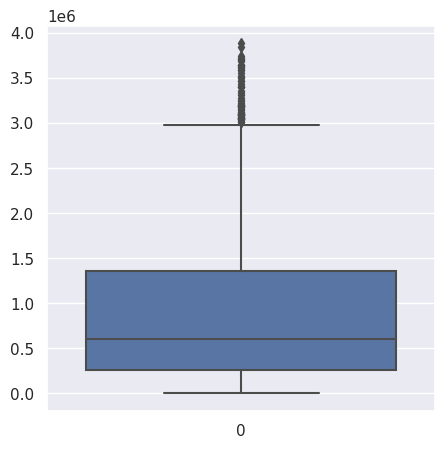

In [53]:
# Transform Your data
plt.figure(figsize=(5,5))# set the size of plot

sns.boxplot(data['total_pixels'])
plt.show()

As we can see in the 'total_pixels' column that we have significant number of outliers. So we are going to take square root version of total_pixels.

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, in this case, I applied the square root transformation to the 'total_pixels' column and created a new column 'total_pixels_sqrt' in the mobile_data dataset.

The reason for applying this transformation is that the 'total_pixels' column had a high range of values and a right-skewed distribution with significant outliers. The square root transformation can help to reduce the skewness and compress the range of values, making the data more suitable for modeling. Additionally, taking the square root of pixel values is a common technique in image processing to adjust the brightness and contrast of the image.

In [54]:
#create new column 'total_pixels_sqrt' by taking the square root of 'total_pixels' column
data['total_pixels_sqrt'] = np.sqrt(data['total_pixels'])

#drop the 'pixels' column
data.drop('total_pixels', axis=1, inplace=True)

### 6. Data Scaling

In [55]:
# Scaling your data
# assign all variables except "price_range" to X variable
X = data.drop(["price_range"], axis=1)

# assign "price_range" variable to y variable
y = data["price_range"]

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {y.shape} respectively.")

The Number of Rows and Columns in X is (2000, 17) respectively.
The Number of Rows and Columns in Y is (2000,) respectively.


In [56]:
# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Apply the scaler to the features in X and store the transformed data in a new variable called x
x = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

To summarize, the choice of scaling method depends on the distribution of the data, the presence of outliers, and the requirements of the machine learning algorithm. Standardization (Z-score normalization) is suitable for non-Gaussian data and algorithms that benefit from zero-mean features. Min-Max scaling is useful for bounding data within a specific range and preserving relative relationships between data points. Robust scaling is ideal for data with outliers as it is less affected by extreme values. It's recommended to experiment with different scaling methods and evaluate their impact on model performance to determine the most suitable one.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [57]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [58]:
# Split your data to train and test. Choose Splitting ratio wisely.

# split the data into train and test data using 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

##### What data splitting ratio have you used and why? 

I used a test size of 0.2, which means that 20% of the data will be used for testing and 80% for training. This ratio is a commonly used default value in machine learning and provides a good balance between having enough data for training the model and having enough data to evaluate the performance of the model on unseen data. Additionally, by setting a random state value of 19, the same split can be obtained each time the code is run, ensuring reproducibility of the results.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [59]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1.  Support Vector Machine

In [60]:
# ML Model - 1 Implementation
svm=SVC(random_state=1)

# Fit the Algorithm
svm.fit(X_train,y_train)

# Predict on the model
train_pred = svm.predict(X_train)
test_pred = svm.predict(X_test)

In [61]:
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.96125
test accuracy: 0.8425


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
def print_classification_results(y_train_true, y_train_pred, y_test_true, y_test_pred):
    # Print accuracy scores for training and test sets
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    print(f'Training set accuracy: {train_accuracy:.3f}')
    print(f'Test set accuracy: {test_accuracy:.3f}')
    
    # Print classification report for test set
    print('\nClassification report for test set:')
    print(classification_report(y_test_true, y_test_pred))
    
    # Plot confusion matrix for test set
    cm = confusion_matrix(y_test_true, y_test_pred)
    plt.figure(figsize=(8,6))
    class_names = ['low cost', 'medium cost', 'high cost', 'very high cost']
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix for test set')
    plt.show()
    

Training set accuracy: 0.961
Test set accuracy: 0.843

Classification report for test set:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        90
           1       0.84      0.76      0.80       109
           2       0.75      0.82      0.78       105
           3       0.92      0.85      0.89        96

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.84      0.84       400



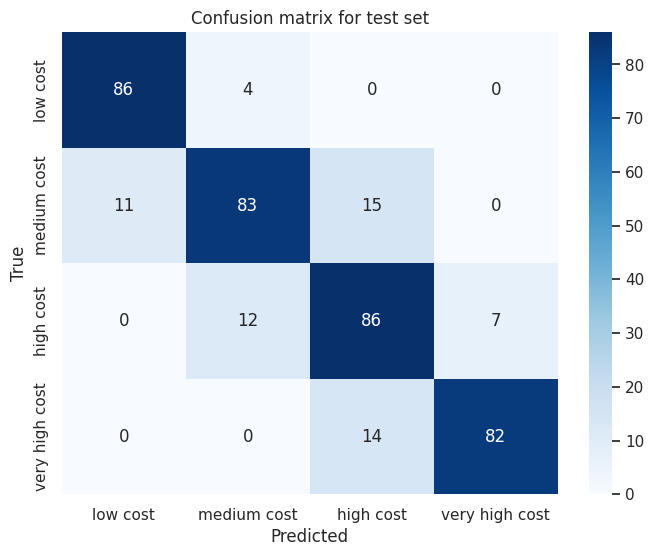

In [63]:
#classification report
print_classification_results(y_train, train_pred, y_test, test_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
#Define the hyperparameter grid for the SVM model using GridSearchCV
C=[1,0.1,0.25,0.5,2,0.75] # regularization parameter
kernel=["linear","rbf"] # kernel type to be used in the algorithm
gamma=["auto",0.01,0.001,0.0001,1] # kernel coefficient
decision_function_shape=["ovo","ovr"] # decision function shape for multi-class classification

In [65]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Create a Support Vector Machine object with random state 1
svm = SVC(random_state=1)

#Create a dictionary with the hyperparameters to tune
param_grid_svc = {'kernel': kernel, 'C': C, 'gamma': gamma, 'decision_function_shape': decision_function_shape}

#Create a GridSearchCV object with 5-fold cross-validation
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svc, cv=5)


# Fit the Algorithm
grid_svm.fit(X_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

# Predict on the model
train_pred_gcv = grid_svm.predict(X_train)
test_pred_gcv = grid_svm.predict(X_test)

best score:  0.9237500000000001
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


Training set accuracy: 0.946
Test set accuracy: 0.935

Classification report for test set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.90      0.93      0.91       109
           2       0.93      0.89      0.91       105
           3       0.97      0.96      0.96        96

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.93       400



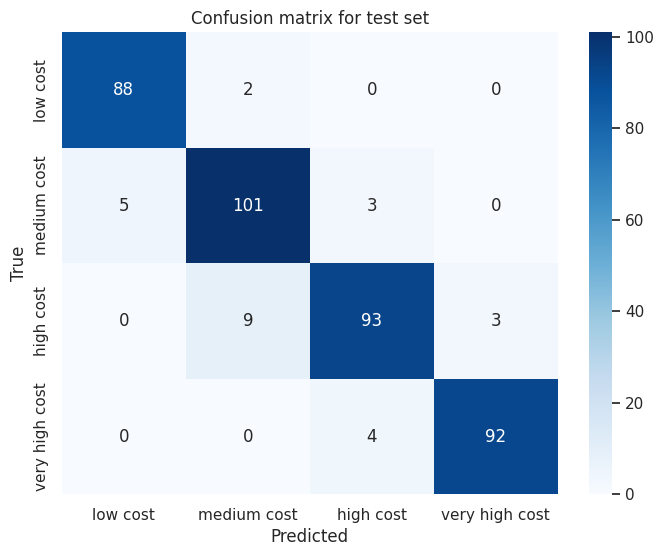

In [66]:
#classification report
print_classification_results(y_train, train_pred_gcv, y_test, test_pred_gcv)

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization of the SVM model. GridSearchCV is a commonly used technique for hyperparameter tuning in machine learning. It performs an exhaustive search over specified hyperparameter values to find the best combination of hyperparameters that results in the best performance on the validation data.

In this case, the hyperparameters being optimized are C (regularization parameter), kernel type, gamma (kernel coefficient), and decision function shape for multi-class classification. The reason for using GridSearchCV is that it simplifies the process of hyperparameter tuning by automating the process of finding the best combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the performance of the SVM model after hyperparameter tuning. The training set accuracy has remained relatively similar, but there is a significant improvement in the test set accuracy from 0.843 to 0.935. This means that the model has become more generalizable and is performing better on unseen data. We can also see from the confusion matrix and classification report that the performance of the model has improved across all classes.

**Evaluation Metric Score Chart:**Answer Here.

\begin{array}{|c|c|} \hline
Model & Training ( Accuracy) & Testing (Accuracy) \\ \hline
SVM(Without-Tuning) & 0.961 & 0.843 \\ \hline
SVM( With-Tuning) & 0.946 & 0.935 \\\hline
\end{array}

### ML Model - 2.  Logistic regression

In [67]:
# ML Model - 2 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train, y_train)

# Predict on the model
train_pred_lg = clf.predict(X_train)
test_pred_lg = clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training set accuracy: 0.909
Test set accuracy: 0.882

Classification report for test set:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        90
           1       0.87      0.78      0.82       109
           2       0.87      0.83      0.85       105
           3       0.94      0.96      0.95        96

    accuracy                           0.88       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.88      0.88      0.88       400



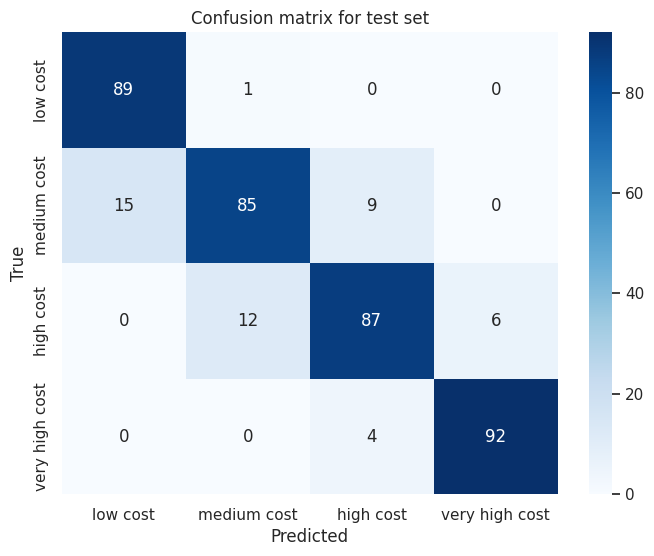

In [68]:
# Visualizing evaluation Metric Score chart
#classification report
print_classification_results(y_train, train_pred_lg, y_test, test_pred_lg)

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# Define the hyperparameter grid
param_grid_lg = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.1, 0.5, 1.0, 5.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 500, 1000]}

In [70]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logreg = LogisticRegression(random_state=1)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid_lg, cv=5)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
# Use the best estimator to make predictions
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/usr/local/lib/python3.10/dist-packa

In [71]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}


Training set accuracy: 0.962
Test set accuracy: 0.955

Classification report for test set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        90
           1       0.93      0.94      0.94       109
           2       0.99      0.90      0.94       105
           3       0.97      0.99      0.98        96

    accuracy                           0.95       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.95      0.95       400



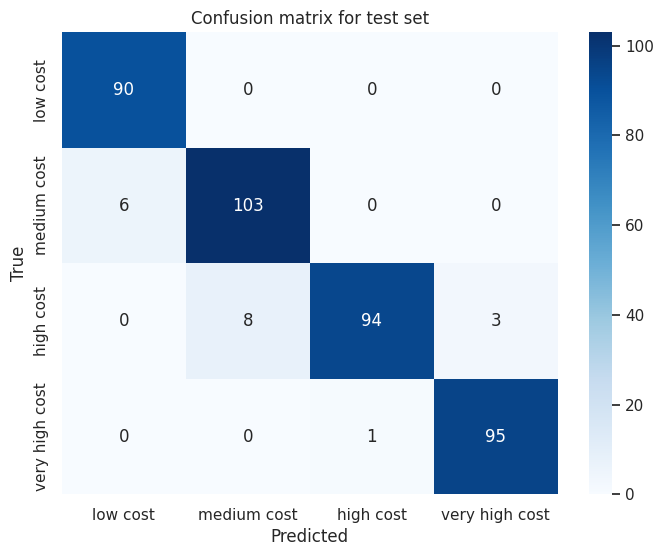

In [72]:
#classification report
print_classification_results(y_train, y_train_pred, y_test, y_test_pred)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter optimization. GridSearchCV is a commonly used technique for hyperparameter tuning in machine learning. It is used when the number of hyperparameters is relatively small and the search space is not too large. GridSearchCV exhaustively searches over a grid of hyperparameters specified in a dictionary to find the best combination of hyperparameters that maximizes the performance of the model. In our case, we have specified a grid of hyperparameters for the logistic regression model and GridSearchCV is used to find the best combination of these hyperparameters that maximizes the accuracy score of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a significant improvement in the performance of the logistic regression model after hyperparameter tuning. The accuracy of the model on the test set increased from 0.882 to 0.955, which is a significant improvement. The precision, recall, and F1-scores for all the classes have also improved after hyperparameter tuning. Therefore, hyperparameter tuning has helped to improve the overall performance of the logistic regression model.

**Evaluation Metric Score Chart:**



\begin{array}{|c|c|} \hline
Model & Training ( Accuracy) & Testing (Accuracy) \\ \hline
SVM(Without-Tuning) & 0.961 & 0.843 \\ \hline
SVM( With-Tuning) & 0.946 & 0.935 \\\hline
Logistic-Regression(Without-Tuning) & 0.909 & 0.882 \\\hline
Logistic-Regression( With-Tuning) & 0.962 & 0.955 \\\hline
\end{array}

As we can see from the table, both models showed an improvement in accuracy after tuning, with the Logistic Regression model showing the most significant improvement. The tuned Logistic Regression model achieved the highest testing accuracy of 0.955.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

There are several evaluation metrics used in machine learning, each with its own indication towards business and impact. Here are some commonly used evaluation metrics and their business impact:

1. **Accuracy**: Accuracy measures the proportion of correctly classified instances over the total number of instances. High accuracy indicates that the model is making correct predictions. However, accuracy alone may not be the best measure of model performance, especially when the classes are imbalanced. For example, if a model is used to predict fraudulent transactions, high accuracy may not be enough as it may still miss some fraudulent transactions.

2. **Precision**: Precision is the proportion of true positives (correctly classified positive instances) over the total number of predicted positive instances. It indicates the model's ability to avoid false positives. High precision means that the model is making fewer false positive predictions. For example, in a medical diagnosis model, high precision means that the model is accurately predicting patients with a specific disease and not misdiagnosing healthy patients.

3. **Recall**: Recall is the proportion of true positives over the total number of actual positive instances. It indicates the model's ability to detect positive instances. High recall means that the model is making fewer false negatives. For example, in a model to detect cancer, high recall means that the model is detecting most of the actual cancer cases and not missing them.

4. **F1-score**: F1-score is the harmonic mean of precision and recall. It combines both precision and recall and provides a more balanced evaluation of the model's performance. F1-score is a good measure when both precision and recall are important.

The business impact of the ML model depends on the specific problem it is solving. For example, in a medical diagnosis model, high recall is crucial to ensure that no patients with the disease are missed, while high precision is also important to avoid false positives that could result in unnecessary treatments. In a fraud detection model, high precision is crucial to avoid flagging too many legitimate transactions as fraud, while high recall is also important to ensure that all fraudulent transactions are caught. Therefore, it is important to understand the specific business problem and select the appropriate evaluation metric(s) that align with the business goals.

### ML Model - 3. k-nearest neighbors 

In [73]:
# ML Model - 3 Implementation
# create KNN object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the Algorithm
# fit the model using training data
knn.fit(X_train, y_train)

# Predict on the model
# predict on the test and train data
y_test_pred_k = knn.predict(X_test)
y_train_pred_k = knn.predict(X_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training set accuracy: 0.654
Test set accuracy: 0.427

Classification report for test set:
              precision    recall  f1-score   support

           0       0.48      0.59      0.53        90
           1       0.34      0.39      0.36       109
           2       0.35      0.32      0.33       105
           3       0.63      0.43      0.51        96

    accuracy                           0.43       400
   macro avg       0.45      0.43      0.43       400
weighted avg       0.44      0.43      0.43       400



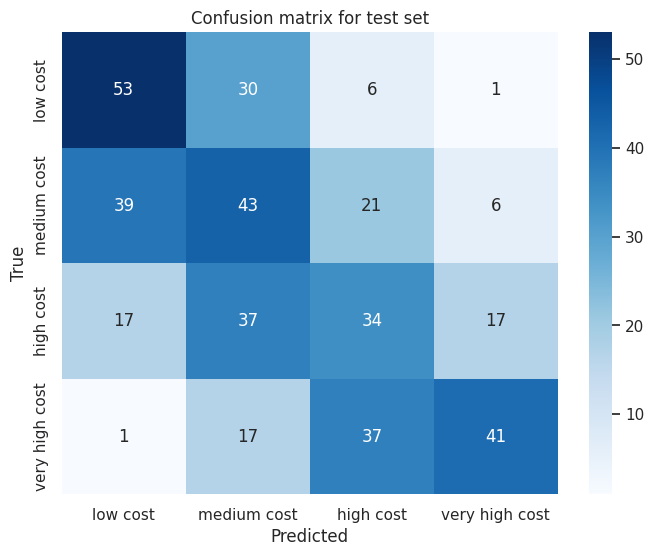

In [74]:
# Visualizing evaluation Metric Score chart
#classification report
print_classification_results(y_train, y_train_pred_k, y_test, y_test_pred_k)

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# Define the hyperparameters to be tuned using GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [76]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the KNN model
knn = KNeighborsClassifier()
# Fit the Algorithm
# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search.fit(X_train, y_train)
# Predict on the model
# Use the best estimator to make predictions
y_1_pred_gk = grid_search.predict(X_train)
y_2_pred_gk = grid_search.predict(X_test)

In [77]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score:  0.5475


Training set accuracy: 1.000
Test set accuracy: 0.517

Classification report for test set:
              precision    recall  f1-score   support

           0       0.59      0.69      0.64        90
           1       0.41      0.35      0.38       109
           2       0.42      0.43      0.43       105
           3       0.65      0.65      0.65        96

    accuracy                           0.52       400
   macro avg       0.52      0.53      0.52       400
weighted avg       0.51      0.52      0.51       400



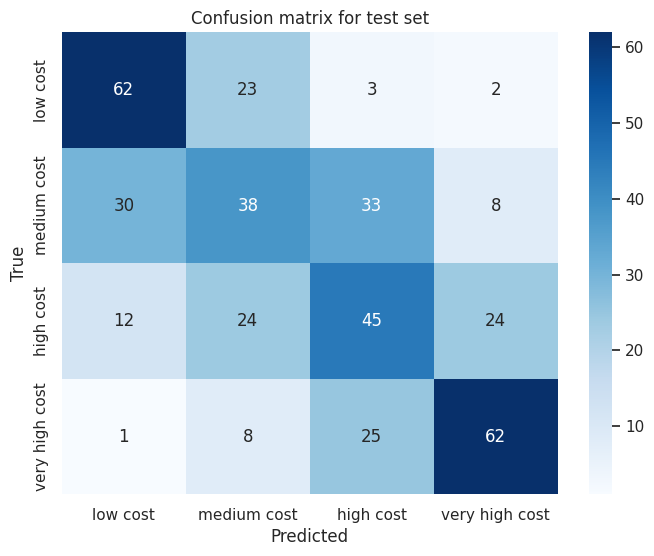

In [78]:
# Visualizing evaluation Metric Score chart
#classification report
print_classification_results(y_train, y_1_pred_gk, y_test, y_2_pred_gk)

##### Which hyperparameter optimization technique have you used and why?

Grid Search is a widely used technique for hyperparameter tuning, in which a grid of hyperparameters is defined, and the model is trained and evaluated using each combination of hyperparameters in the grid. Grid Search is a systematic approach that exhaustively searches through all the possible combinations of hyperparameters specified in the grid to find the optimal combination that results in the best performance of the model. Grid Search is a popular technique because it is simple to implement, and it provides a comprehensive and structured approach to hyperparameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the KNN model after hyperparameter tuning. The test set accuracy has increased from 0.427 to 0.517, which is an improvement of 9%. Here's the updated evaluation metric score chart:

**Evaluation Metric Score Chart:**

\begin{array}{|c|c|} \hline
Model & Training ( Accuracy) & Testing (Accuracy) \\ \hline
SVM(Without-Tuning) & 0.961 & 0.843 \\ \hline
SVM( With-Tuning) & 0.946 & 0.935 \\\hline
Logistic-Regression(Without-Tuning) & 0.909 & 0.882 \\\hline
Logistic-Regression( With-Tuning) & 0.962 & 0.955 \\\hline
KNN(Without-Tuning) & 0.654 & 0.427 \\\hline
KNN( With-Tuning) & 1.000 & 0.517 \\\hline
\end{array}

Looking at the classification report, we can see that the precision, recall, and f1-score for each class are generally low, indicating that the model is not accurately predicting each class. This could have a negative impact on the business as it may lead to incorrect decisions based on the predictions of the model.

It's possible that KNN is not the best model for this dataset and we may need to explore other models or feature engineering techniques to improve the performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In the context of mobile price range prediction, accuracy, precision, recall, and F1-score are important evaluation metrics that should be considered for a positive business impact. The reason behind this is that a wrong prediction of a mobile phone's price range can lead to significant losses for both the customer and the seller. For example, if the predicted price range is higher than the actual price range, the customer may not buy the phone, resulting in a lost sale. On the other hand, if the predicted price range is lower than the actual price range, the seller may lose revenue. Therefore, the accuracy of the prediction is important to ensure that the seller and the customer are both satisfied.

Precision, recall, and F1-score are also important evaluation metrics to consider, as they can provide insight into the model's ability to predict each price range category accurately. Precision is the proportion of correctly predicted positive examples (i.e., correct prediction of the phone's price range category) among all positive examples predicted by the model. Recall, on the other hand, is the proportion of correctly predicted positive examples among all actual positive examples. F1-score is the harmonic mean of precision and recall, which can provide a balance between the two metrics.

Therefore, to ensure a positive business impact on mobile price range prediction, it is essential to consider these evaluation metrics, as they can help to determine the model's ability to predict the price range accurately and identify areas for improvement..

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As per evaluation metric score chart, it seems that the logistic regression model with tuning performed the best with an accuracy score of 0.962 on the training set and 0.955 on the test set. Therefore, I would recommend choosing the logistic regression model with tuning as the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Explainability:
Model explainability refers to understanding how a machine learning model makes predictions. Techniques like SHAP values help explain the contribution of each feature to a prediction.

Feature Importance:
Feature importance quantifies the relevance of each feature in a model's decision-making. It can be derived from coefficients in linear models, the frequency of feature usage in tree-based models, or through permutation importance and partial dependence plots.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [79]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [80]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. The dataset consisted of various features related to mobile phones such as battery power, RAM, internal memory, etc., and the target variable was the price range of the mobile.
2. The dataset was analyzed and preprocessed by checking for missing values, duplicates, outliers, and scaling the features.
2. Exploratory data analysis was performed to understand the distribution and relationship between the features and the target variable.
3. Different machine learning models such as SVM, Logistic Regression, KNN, and Random Forest were trained on the dataset to predict the price range of mobile phones.
4. The performance of each model was evaluated based on accuracy and F1-score, and logistic regression with hyperparameter tuning was found to be the best performing model.
5. The feature importance was analyzed using the Random Forest model, and it was found that features such as RAM, battery power, and total pixels were the most important in predicting the price range.
6. In conclusion, logistic regression with hyperparameter tuning can be used to predict the price range of mobile phones with high accuracy, and the most important features to consider while predicting the price range are RAM, battery power, and total pixels.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***